In [4]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.1 MB 1.1 MB/s eta 0:00:35
   ---------------------------------------- 0.3/38.1 MB 2.3 MB/s eta 0:00:17
    --------------------------------------- 0.7/38.1 MB 4.1 MB/s eta 0:00:10
   - -------------------------------------- 1.6/38.1 MB 8.1 MB/s eta 0:00:05
   ---- ----------------------------------- 4.4/38.1 MB 17.5 MB/s eta 0:00:02
   ----- ---------------------------------- 5.7/38.1 MB 21.2 MB/s eta 0:00:02
   -------- ------------------------------- 8.2/38.1 MB 24.9 MB/s eta 0:00:02
   ----------- ---------------------------- 10.9/38.1 MB 43.5 MB/s eta 0:00:01
   ---------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
img1 = cv2.imread('14115.jpg')
img2 = cv2.imread('RAU.jpg')
img3 = cv2.imread('blog_post.jpg')


In [3]:
import cv2
import pandas as pd

image_path = '14115.jpg'

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# пороговое преобразование
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

points_coordinates = []
for contour in contours:
    for point in contour:
        x, y = point[0]
        points_coordinates.append((x, y))
        
df = pd.DataFrame(points_coordinates, columns=['X', 'Y'])

# Вывод DataFrame
print(df.head())

     X    Y
0  146  403
1  146  412
2  146  393
3  146  399
4  147  371


In [4]:
import cv2
import pandas as pd

image_path = 'RAU.jpg'

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

points_coordinates = []
for contour in contours:
    for point in contour:
        x, y = point[0]
        points_coordinates.append((x, y))

dt = pd.DataFrame(points_coordinates, columns=['X', 'Y'])

print(dt.head())

     X    Y
0  784  599
1  785  599
2  782  599
3  775  599
4  716  599


In [5]:
import cv2
import pandas as pd

image_path = 'blog_post.jpg'

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Нахождение контуров
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Извлечение координат точек из контуров
points_coordinates = []
for contour in contours:
    for point in contour:
        x, y = point[0]
        points_coordinates.append((x, y))

dp = pd.DataFrame(points_coordinates, columns=['X', 'Y'])

print(dp.head())

     X    Y
0  267  398
1  266  399
2  262  399
3  286  399
4  285  398


In [6]:
model1 = KMeans(n_clusters=5, n_init='auto').fit(df.iloc[:,:2])
model2 = KMeans(n_clusters=5, n_init='auto').fit(dt.iloc[:,:2])
model3 = KMeans(n_clusters=5, n_init='auto').fit(dp.iloc[:,:2])

In [7]:
out1 = []
nr_clusters = np.arange(2, 21)
for k in nr_clusters:
    model1.n_clusters = k
    model1.fit(df.iloc[:,:2])
    out1.append(silhouette_score(df.iloc[:,:2], model1.labels_))
out1 = np.array(out1)

In [8]:
out2 = []
nr_clusters = np.arange(2, 21)
for k in nr_clusters:
    model2.n_clusters = k
    model2.fit(dt.iloc[:,:2])
    out2.append(silhouette_score(dt.iloc[:,:2], model2.labels_))
out2 = np.array(out2)

In [9]:
out3 = []
nr_clusters = np.arange(2, 21)
for k in nr_clusters:
    model3.n_clusters = k
    model3.fit(dp.iloc[:,:2])
    out3.append(silhouette_score(dp.iloc[:,:2], model3.labels_))
out3 = np.array(out3)

In [10]:
print(out1)
print()
print(out2)
print()
print(out3)

[0.55251608 0.4586581  0.4544273  0.44304196 0.48365    0.4513214
 0.49682994 0.46672858 0.47153358 0.48985349 0.49231302 0.45051383
 0.46230364 0.46026677 0.4735079  0.48863889 0.47982227 0.48632697
 0.48772053]

[0.55650246 0.50262588 0.43876077 0.44336546 0.43233821 0.45196125
 0.44939773 0.42763274 0.40698801 0.4106013  0.40234945 0.40463487
 0.41515807 0.40903597 0.41595425 0.41218647 0.42640022 0.42309435
 0.42079105]

[0.42503076 0.42781084 0.44655549 0.44635459 0.45180585 0.4415624
 0.43056755 0.4135274  0.42498639 0.43018449 0.41126621 0.41133839
 0.40666944 0.40014117 0.40425498 0.38891024 0.39698984 0.40321616
 0.39917379]


In [11]:
nr_clusters[np.argmax(out1)]

2

In [12]:
nr_clusters[np.argmax(out2)]

2

In [13]:
nr_clusters[np.argmax(out3)]

6

In [14]:
def read_img(img_name):
    img = cv2.imread(img_name)
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


def imshow(img):
    plt.figure(figsize=(9, 9))
    plt.imshow(img)
    plt.axis('off');

In [15]:
def segment(img_name, n_clusters=2, model=KMeans):
    img = read_img(img_name) # (h, w, 3)
    # from 3D image to matrix of colors (nr_pixels, 3)
    vectorized = np.float32(img.reshape((-1, 3)))
    model = model(n_clusters=n_clusters, n_init='auto').fit(vectorized)
    centers = np.uint8(model.cluster_centers_)  # [color1, color2]
    img_seg = centers[model.labels_].reshape(img.shape) # (h, w, 3)

    imshow(img)
    imshow(img_seg)

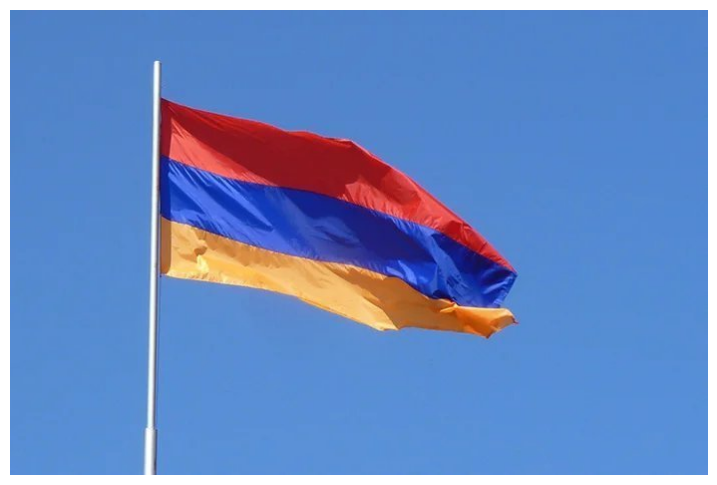

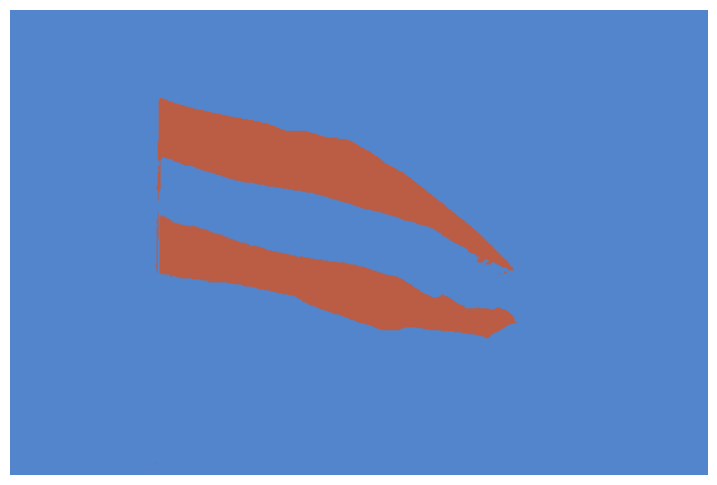

In [16]:
segment('14115.jpg', n_clusters=nr_clusters[np.argmax(out1)])

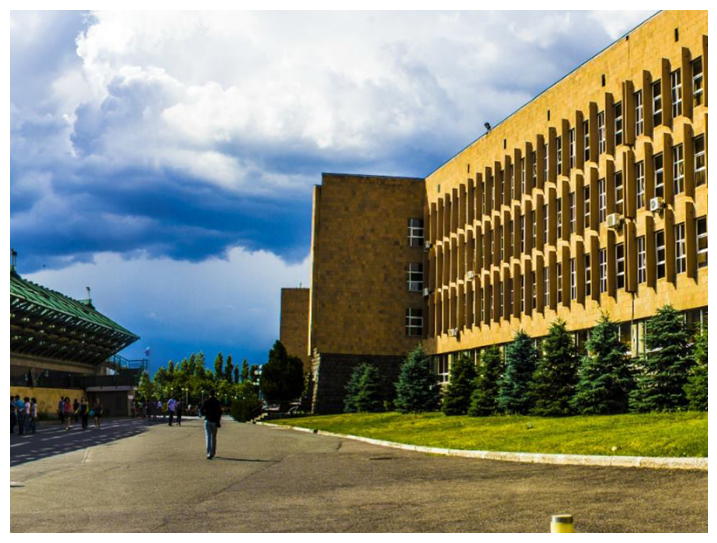

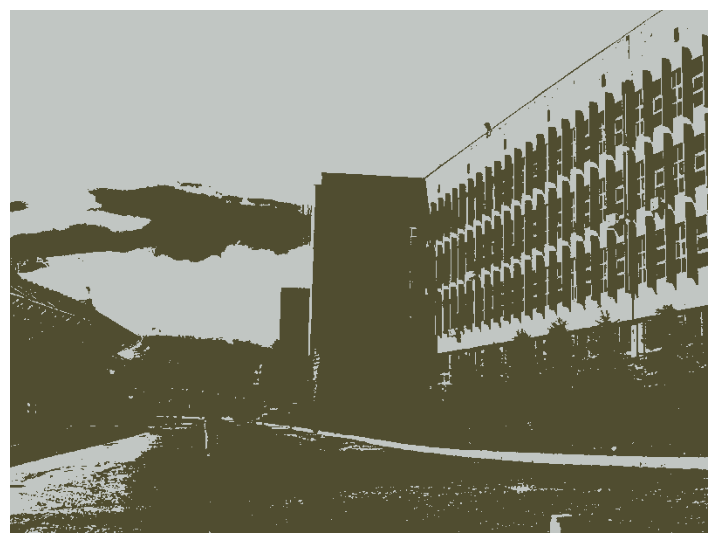

In [17]:
segment('RAU.jpg', n_clusters=nr_clusters[np.argmax(out2)])

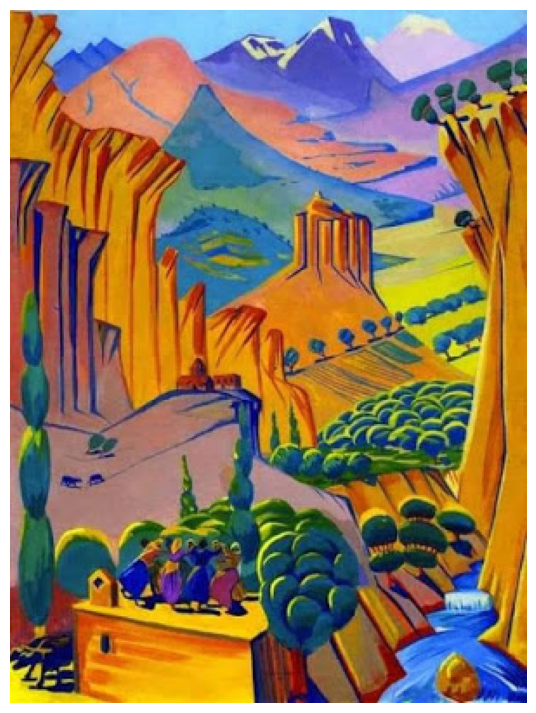

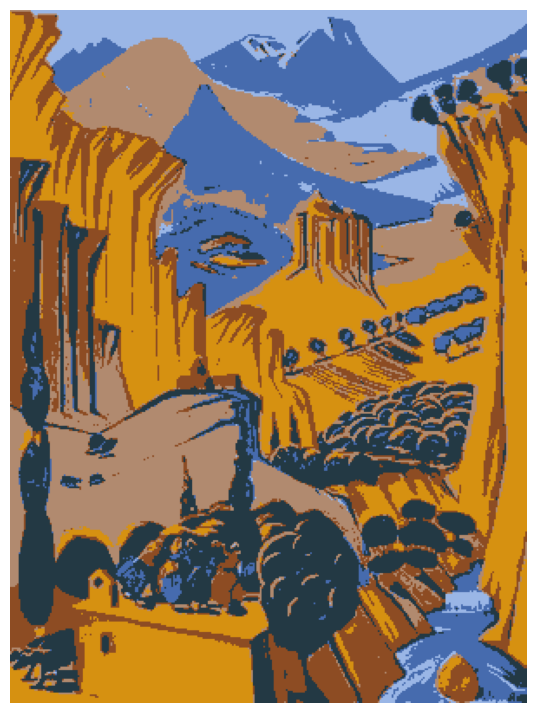

In [18]:
segment('blog_post.jpg', n_clusters=nr_clusters[np.argmax(out3)])

In [19]:
image_path = 'blog_post.jpg'

image = cv2.imread(image_path)
height, width, _ = image.shape

points_coordinates = []
for y in range(height):
    for x in range(width):
        points_coordinates.append((x, y))

# Создание DataFrame для хранения координат
df = pd.DataFrame(points_coordinates, columns=['X', 'Y'])

print(df)

          X    Y
0         0    0
1         1    0
2         2    0
3         3    0
4         4    0
...     ...  ...
119195  293  399
119196  294  399
119197  295  399
119198  296  399
119199  297  399

[119200 rows x 2 columns]


In [20]:
model = KMeans(n_clusters=5, n_init='auto').fit(df.iloc[:,:2])

In [ ]:
out = []
nr_clusters = np.arange(2, 21)
for k in nr_clusters:
    model.n_clusters = k
    model.fit(df.iloc[:,:2])
    out.append(silhouette_score(df.iloc[:,:2], model.labels_))
out = np.array(out)

In [ ]:
nr_clusters[np.argmax(out)]

In [ ]:
segment('blog_post.jpg', n_clusters=nr_clusters[np.argmax(out)])